In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mouse_tissues")

In [3]:
RESULTS_DIR = "results_200ng"
EXAMPLE_CONDPAIR = ('brain', 'testis')

In [4]:
import alphaquant.utils.utils as aqutils
list_of_condpairnames = [f.replace('.iontrees.json', '') for f in os.listdir(RESULTS_DIR) if f.endswith('.iontrees.json')]
unique_conds = set([c for cp in list_of_condpairnames for c in cp.split('_VS_')])

list_of_condpairs = [tuple(aqutils.get_condpair_from_condpairname(cp)) for cp in list_of_condpairnames]
print(unique_conds)
print(list_of_condpairs)

{'lungs', 'spleen', 'kidney', 'brain', 'testis'}
[('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), ('brain', 'spleen')]


In [5]:
def get_condpair2proteoforms(results_folder, list_of_condpairs):
    condpair2proteoforms = {}
    for condpair in list_of_condpairs:
        condpair_tree = aqutils.read_condpair_tree(cond1=condpair[0], cond2=condpair[1], results_folder=results_folder)
        proteoform_ids = get_proteoform_ids_from_condpair(condpair_tree)
        condpair2proteoforms[condpair] = proteoform_ids
    return condpair2proteoforms


def get_proteoform_ids_from_condpair(condpairtree):
    proteoform_ids = set()
    for protnode in condpairtree.children:
        fraction_mainclust = get_fraction_mainclust(protnode)
        if fraction_mainclust < 1:
            proteoform_ids.add(protnode.name)
    return proteoform_ids


def get_fraction_mainclust(protnode):
    peptides = protnode.children
    mainclust_count = 0
    for peptide in peptides:
        if peptide.cluster ==0:
            mainclust_count += 1
    return mainclust_count/len(peptides)
    

In [6]:
condpair2proteoforms = get_condpair2proteoforms(RESULTS_DIR, list_of_condpairs)
print(condpair2proteoforms)

{('lungs', 'kidney'): {'Q3U487', 'A0A5F8MPW1;Q3UTR7', 'P47811', 'Q9R1P4', 'Q61133', 'A0A0A0MQF6;A0A1D5RLD8;P16858;S4R1W1', 'B9EKJ3;Q80TL7-2', 'A0A087WQT6;O89110', 'P54823', 'Q6NSR8', 'Q9DD02', 'Q91YR7', 'A0A0R4J107;Q8R146;Q8R146-2', 'P62242', 'F2Z4A9;H3BLH0;Q6DIC0', 'P97370', 'D6RGQ0;E9Q8H9;E9Q8I0;P06909', 'P40936', 'Q8C4B4', 'O89017', 'Q3U422', 'Q9CQN6', 'P63001;Q3TLP8', 'Q64737', 'Q8R502', 'O88325', 'Q8VCG4;Q9DAC2', 'P54726;Q3TN85;Q8CAP3', 'Q62093', 'B2RXS4', 'Q8K0E8', 'Q99JY9', 'E9Q414', 'Q9ESW4', 'Q9ER72', 'Q9QXD8', 'A0A0R4J0L5', 'Q8C3X2', 'A0A0R4J050', 'Q01853', 'Q99JY3', 'Q6NT99', 'P62751', 'Q99MK8', 'Q8C483', 'A0A3B2WBL1;P53026;Q5XJF6', 'E9QB02', 'Q04857', 'G5E895', 'Q7TNV0', 'Q60648', 'Q9WVA4', 'Q3UMU9-2;Q3UMU9-4', 'Q80X90', 'Q9CWS0', 'Q61553', 'E9PZ16', 'Q9WU28', 'A0A5F8MQC8', 'Q9D1E6', 'Q8CIH5', 'O08749', 'Q9CR09', 'Q8CG76', 'A0A2C9F2D2;Q07076', 'P27612', 'P28828;Q68FM4', 'P23780', 'Q91WN1', 'D3Z7E5;Q2NL51', 'Q06890', 'B7ZC46', 'Q8CIB5', 'A0A0R4J259;Q7TMK9;Q7TMK9-2', 'P15208'

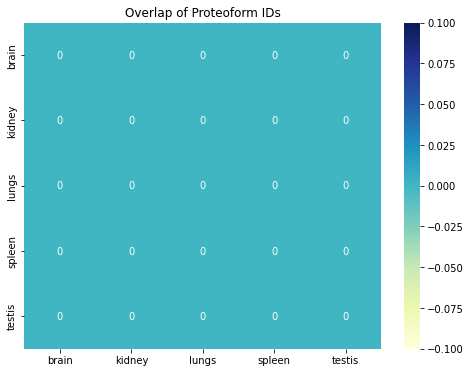

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dictionary (replace with your actual data)
# condpair2proteoforms = {
#     ('A', 'A'): {'P1', 'P2', 'P3', 'P4'},
#     ('A', 'B'): {'P2', 'P3'},
#     ('A', 'C'): {'P3', 'P4'},
#     ('B', 'B'): {'P2', 'P5', 'P6'},
#     ('B', 'C'): {'P5'},
#     ('C', 'C'): {'P7', 'P8', 'P9'}
# }

# Extract unique conditions from the dictionary keys
conditions = sorted(list(set([cond for pair in condpair2proteoforms for cond in pair])))

# Initialize overlap matrix with zeros
overlap_matrix = np.zeros((len(conditions), len(conditions)), dtype=int)

# Populate the overlap matrix
for i, cond1 in enumerate(conditions):
    for j, cond2 in enumerate(conditions):
        overlap = len(condpair2proteoforms.get((cond1, cond2), set()).intersection(condpair2proteoforms.get((cond2, cond1), set())))
        overlap_matrix[i, j] = overlap

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(overlap_matrix, annot=True, cmap="YlGnBu", xticklabels=conditions, yticklabels=conditions)
plt.title("Overlap of Proteoform IDs")
plt.show()


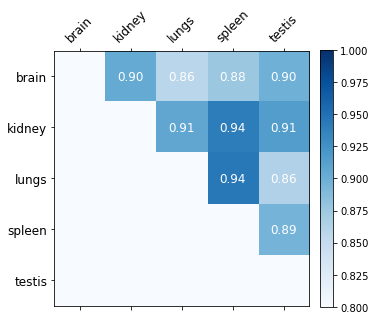

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# # Given lists
# pairs = [('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), 
#          ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), 
#          ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), 
#          ('brain', 'spleen')]

# values = [0.5, 0.6, 0.2, 0.8, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]  # Assuming these dummy values

pairs = list_of_condpairs
values = mean_fraction_per_condpair
# Unique tissues, sorted
tissues = sorted(list(set([t for pair in pairs for t in pair])))

# Ensure pairs are in the form (t1, t2) where t1 comes before t2 in the sorted list
sorted_pairs = []
for t1, t2 in pairs:
    if tissues.index(t1) > tissues.index(t2):
        t1, t2 = t2, t1  # swap
    sorted_pairs.append((t1, t2))

# Create an empty matrix
matrix = np.zeros((len(tissues), len(tissues)))

# Fill in the values
for (t1, t2), value in zip(sorted_pairs, values):
    idx1 = tissues.index(t1)
    idx2 = tissues.index(t2)
    matrix[idx1, idx2] = value

# Create a custom colormap
cmap = plt.cm.coolwarm
my_cmap = cmap(np.arange(cmap.N))
my_cmap[0, :3] = 1.0  # Set the RGB values of the first entry (i.e., zero values) to white
my_cmap = ListedColormap(my_cmap)

# Plot
fig, ax = plt.subplots(figsize=(5, 6))
cax = ax.matshow(matrix, cmap='Blues', vmin = 0.8, vmax = 1)
fig.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_xticks(np.arange(len(tissues)),)
ax.set_yticks(np.arange(len(tissues)), )
ax.set_xticklabels(tissues, rotation=45,  fontsize=12)
ax.set_yticklabels(tissues, fontsize=12)

# Annotate each cell with the numeric value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] != 0:
            ax.text(j, i, f"{matrix[i, j]:.2f}", va='center', ha='center', color='black' if matrix[i, j] < 0.7 else 'white', fontsize=12)

plt.show()

fig.savefig('heatmap_mainclust_fraction_per_condpair.pdf', dpi=300, bbox_inches='tight')




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given lists
pairs = [('lungs', 'kidney'), ('lungs', 'spleen'), ('testis', 'spleen'), 
         ('testis', 'kidney'), ('lungs', 'brain'), ('lungs', 'testis'), 
         ('kidney', 'spleen'), ('brain', 'testis'), ('brain', 'kidney'), 
         ('brain', 'spleen')]

values = [0.5, 0.6, 0.2, 0.8, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]  # Assuming these dummy values

# Unique tissues, sorted
tissues = sorted(list(set([t for pair in pairs for t in pair])))

# Ensure pairs are in the form (t1, t2) where t1 comes before t2 in the sorted list
sorted_pairs = []
for t1, t2 in pairs:
    if tissues.index(t1) > tissues.index(t2):
        t1, t2 = t2, t1  # swap
    sorted_pairs.append((t1, t2))

# Create an empty matrix
matrix = np.zeros((len(tissues), len(tissues)))

# Fill in the values
for (t1, t2), value in zip(sorted_pairs, values):
    idx1 = tissues.index(t1)
    idx2 = tissues.index(t2)
    matrix[idx1, idx2] = value

# Adjust color range to data range
data_min = min(values)
data_max = max(values)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(matrix, cmap='Blues', vmin=data_min, vmax=data_max)

# Adjust colorbar size and position
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)  # Increase font size for colorbar ticks

# Set tick labels and font size
ax.set_xticks(np.arange(len(tissues)))
ax.set_yticks(np.arange(len(tissues)))
ax.set_xticklabels(tissues, rotation=45, fontsize=12)  # Increased font size
ax.set_yticklabels(tissues, fontsize=12)  # Increased font size

# Set title with increased font size
ax.set_title('Heatmap of Mean Fraction of Main Cluster', pad=20, fontsize=14)

# Annotate each cell with the numeric value with increased font size
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if matrix[i, j] != 0:
            ax.text(j, i, f"{matrix[i, j]:.2f}", va='center', ha='center', fontsize=10, color='black' if matrix[i, j] < 0.7 else 'white')

plt.tight_layout()
plt.show()
